In [1]:
# %matplotlib notebook

In [1]:
import pandas as pd
import requests
import pprint as pprint
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = "IEA-EV-data.csv"
df = pd.read_csv(data)
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,<<<<<<< HEAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,Historical,EV sales,Cars,BEV,2011.0,sales,49.00
2,Australia,Historical,EV stock,Cars,BEV,2011.0,stock,49.00
3,Australia,Historical,EV sales share,Cars,EV,2011.0,percent,0.01
4,Australia,Historical,EV stock share,Cars,EV,2011.0,percent,0.00


In [3]:
#Clean & check data
df=df.dropna(how='any')
df.dtypes

region         object
category       object
parameter      object
mode           object
powertrain     object
year          float64
unit           object
value         float64
dtype: object

In [4]:
#Filter for historical sales only, exclude 'World' & 2010 when not all countries had sales
filtered_df=df.loc[(df['category']=='Historical') & (df['parameter'] == 'EV sales') & (df["region"] != "World")&(df["year"] != 2010)]
filtered_df.tail(40)

,region,category,parameter,mode,powertrain,year,unit,value
13274,United Kingdom,Historical,EV sales,Trucks,BEV,2019.0,sales,10.0
13287,United Kingdom,Historical,EV sales,Cars,PHEV,2019.0,sales,36630.0
13290,United Kingdom,Historical,EV sales,Cars,BEV,2019.0,sales,37972.0
13292,United Kingdom,Historical,EV sales,Vans,BEV,2019.0,sales,3236.0
13293,United Kingdom,Historical,EV sales,Vans,PHEV,2019.0,sales,205.0
13294,United Kingdom,Historical,EV sales,Vans,PHEV,2020.0,sales,576.0
13295,United Kingdom,Historical,EV sales,Vans,BEV,2020.0,sales,5350.0
13297,United Kingdom,Historical,EV sales,Cars,BEV,2020.0,sales,107575.0
13300,United Kingdom,Historical,EV sales,Cars,PHEV,2020.0,sales,67461.0
13313,United Kingdom,Historical,EV sales,Trucks,BEV,2020.0,sales,4.0


In [5]:
#Create sales specific df for future usage
sales_df = pd.DataFrame(filtered_df.groupby(['year','region']).sum())


In [6]:
#Filter for historic charging stations only, exclude 'World'
filtered_df2=df.loc[(df['category']=='Historical') & (df['parameter'] == 'EV charging points')& (df["region"] != "World")]
filtered_df2

,region,category,parameter,mode,powertrain,year,unit,value
39,Australia,Historical,EV charging points,EV,Publicly available fast,2017.0,charging points,40.00
40,Australia,Historical,EV charging points,EV,Publicly available slow,2017.0,charging points,436.00
44,Australia,Historical,EV charging points,EV,Publicly available fast,2018.0,charging points,61.09
45,Australia,Historical,EV charging points,EV,Publicly available slow,2018.0,charging points,665.92
56,Australia,Historical,EV charging points,EV,Publicly available fast,2019.0,charging points,251.00
...,...,...,...,...,...,...,...,...
13435,USA,Historical,EV charging points,EV,Publicly available slow,2019.0,charging points,64265.00
13474,USA,Historical,EV charging points,EV,Publicly available fast,2020.0,charging points,16718.00
13475,USA,Historical,EV charging points,EV,Publicly available slow,2020.0,charging points,82263.00
13502,USA,Historical,EV charging points,EV,Publicly available fast,2021.0,charging points,21752.00


In [7]:
#Create charging specific df for future usage
charging_df= pd.DataFrame(filtered_df2.groupby(['year','region']).sum())
charging_df

value
year   region                       
2010.0 Japan              624.000000
       Netherlands        800.000000
       Norway            5600.000000
       USA                963.840349
2011.0 Chile                4.000000
...                              ...
2021.0 Sweden           28188.000000
       Switzerland      16416.000000
       Thailand          4570.000000
       USA             227054.000000
       United Kingdom   73788.000000

[261 rows x 1 columns]

In [8]:
# Create dataframe of all time car sales by country
total_sales = filtered_df.groupby(['region'])[['value']].sum().astype(int)
total_sales

,value
region,
Australia,95488
Belgium,370680
Brazil,25636
Canada,577515
Chile,2930
China,17999710
Denmark,254304
Finland,136778
France,1586518


In [9]:
# Remove Other Europe from the dataframe
# total_sales.drop(["Other Europe"], inplace = True)
total_sales

,value
region,
Australia,95488
Belgium,370680
Brazil,25636
Canada,577515
Chile,2930
China,17999710
Denmark,254304
Finland,136778
France,1586518


Text(0, 0.5, 'Number of EVs sold')

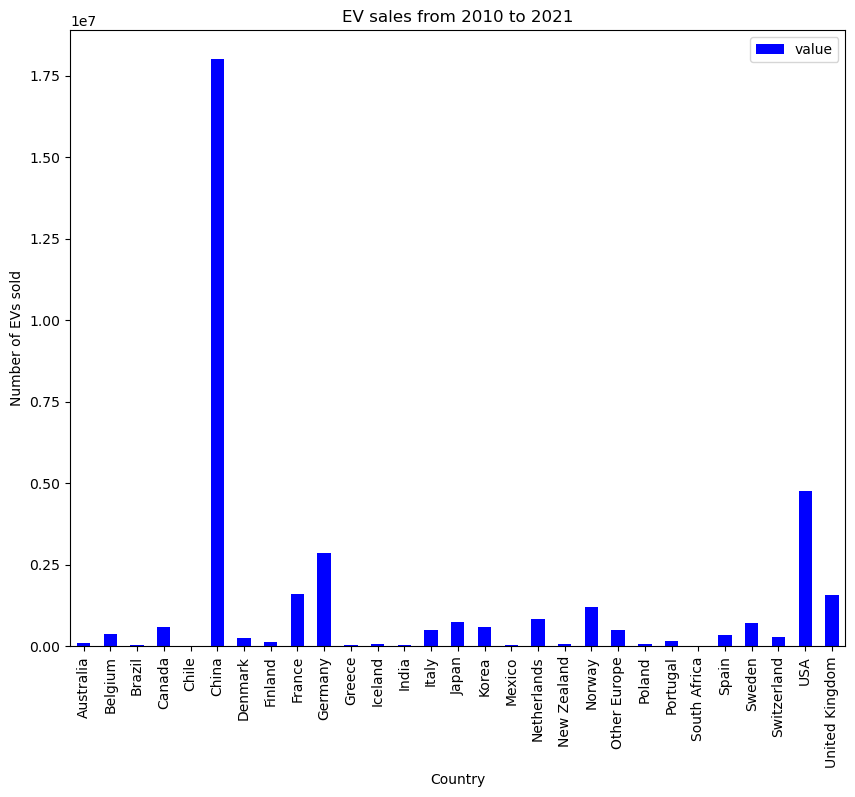

In [10]:
# Create a bar chart of total sales
total_sales_bar = total_sales.plot(kind="bar",figsize=(10,8),color = "blue",label = "Country",title = "EV sales from 2010 to 2021")
total_sales_bar.set_xlabel("Country")
total_sales_bar.set_ylabel("Number of EVs sold")



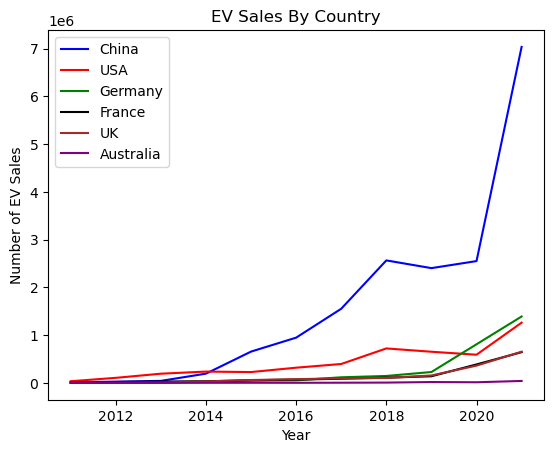

In [11]:
# Create a line chart of sales in the whole period for 5 biggest sales countries and australia
xtickers = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
china_sales = filtered_df.loc[filtered_df["region"]=="China"].groupby(["year"])["value"].sum()
USA_sales = filtered_df.loc[filtered_df["region"]=="USA",:].groupby(["year"])["value"].sum()
UK_sales = filtered_df.loc[filtered_df["region"]=="United Kingdom",:].groupby(["year"])["value"].sum()
germany_sales = filtered_df.loc[filtered_df["region"]=="Germany",:].groupby(["year"])["value"].sum()
france_sales = filtered_df.loc[filtered_df["region"]=="France",:].groupby(["year"])["value"].sum()
aus_sales = filtered_df.loc[filtered_df["region"]=="Australia",:].groupby(["year"])["value"].sum()

# Create a line chart of the EV sales through out the period
plt.plot(xtickers,china_sales, label = "China",color="blue")
plt.plot(xtickers,USA_sales, label = "USA",color="red")
plt.plot(xtickers,germany_sales, label = "Germany",color="green")
plt.plot(xtickers,france_sales, label = "France",color="black")
plt.plot(xtickers,UK_sales,label = "UK",color="brown")
plt.plot(xtickers,aus_sales, label = "Australia",color="purple")
plt.xlabel("Year")
plt.ylabel("Number of EV Sales")
plt.title("EV Sales By Country")
plt.legend(loc = "upper left")
plt.show()

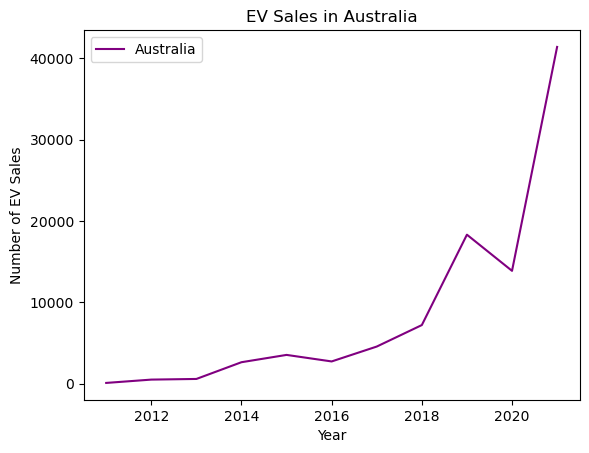

In [12]:
# Create a line chart of number of EV sales in Australia
plt.plot(xtickers,aus_sales, label = "Australia",color="purple")
plt.xlabel("Year")
plt.ylabel("Number of EV Sales")
plt.title("EV Sales in Australia")
plt.legend(loc = "upper left")

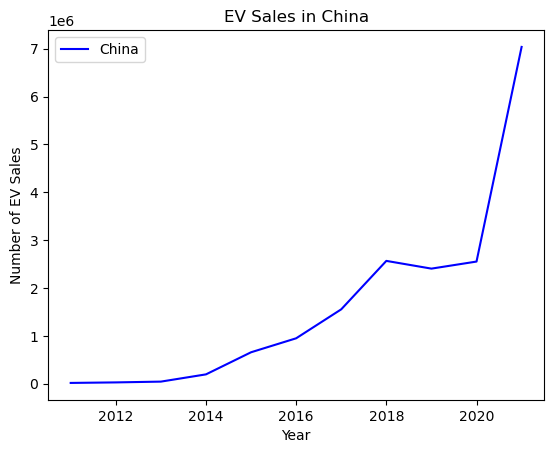

In [13]:
# Create a line chart of the EV sales through out the period in China
plt.plot(xtickers,china_sales, label = "China",color="blue")
plt.xlabel("Year")
plt.ylabel("Number of EV Sales")
plt.title("EV Sales in China")
plt.legend(loc = "upper left")

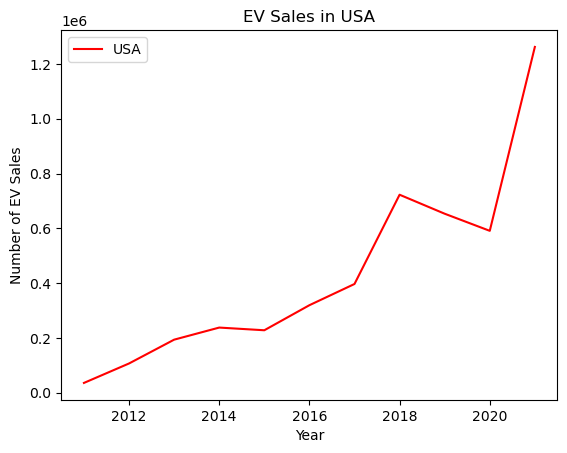

In [14]:
# Create a line chart of the EV sales through out the period in USA
plt.plot(xtickers,USA_sales, label = "USA",color="red")
plt.xlabel("Year")
plt.ylabel("Number of EV Sales")
plt.title("EV Sales in USA")
plt.legend(loc = "upper left")

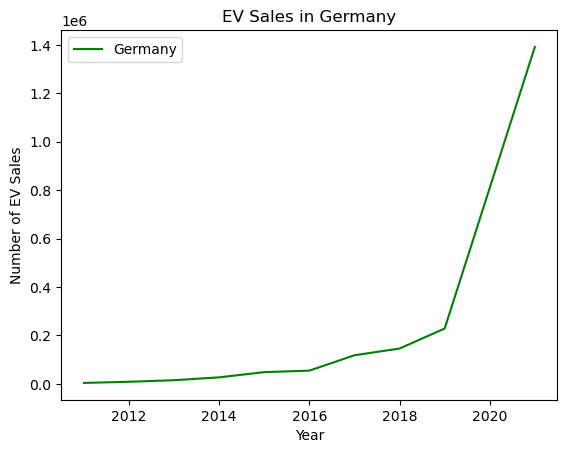

In [15]:
# Create a line chart of the EV sales through out the period in Germany
plt.plot(xtickers,germany_sales, label = "Germany",color="green")
plt.xlabel("Year")
plt.ylabel("Number of EV Sales")
plt.title("EV Sales in Germany")
plt.legend(loc = "upper left")

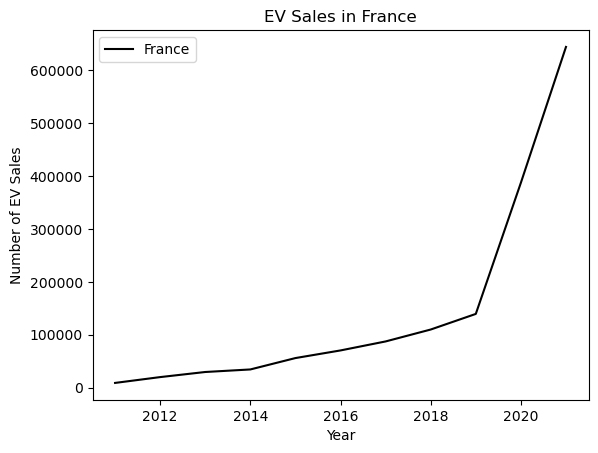

In [16]:
# Create a line chart of the EV sales through out the period in France
plt.plot(xtickers,france_sales, label = "France",color="black")
plt.xlabel("Year")
plt.ylabel("Number of EV Sales")
plt.title("EV Sales in France")
plt.legend(loc = "upper left")


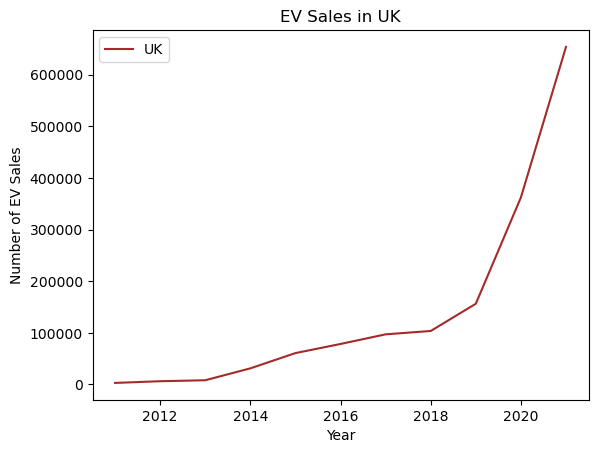

In [17]:
# Create a line chart of the EV sales through out the period in UK
plt.plot(xtickers,UK_sales,label = "UK",color="brown")
plt.xlabel("Year")
plt.ylabel("Number of EV Sales")
plt.title("EV Sales in UK")
plt.legend(loc = "upper left")

In [18]:
# Filter data to show charging stations from 2017 to 2021 when all countries have reported data
filtered_df3 = filtered_df2.loc[(filtered_df2["year"] ==2017)|(filtered_df2["year"] ==2018)|(filtered_df2["year"] ==2019)|(filtered_df2["year"] ==2020)|(filtered_df2["year"] ==2021),:]
print(filtered_df3)
filtered_df3.to_csv("ChargingPoint.csv")

          region    category           parameter mode  \
39     Australia  Historical  EV charging points   EV   
40     Australia  Historical  EV charging points   EV   
44     Australia  Historical  EV charging points   EV   
45     Australia  Historical  EV charging points   EV   
56     Australia  Historical  EV charging points   EV   
...          ...         ...                 ...  ...   
13435        USA  Historical  EV charging points   EV   
13474        USA  Historical  EV charging points   EV   
13475        USA  Historical  EV charging points   EV   
13502        USA  Historical  EV charging points   EV   
13503        USA  Historical  EV charging points   EV   

                    powertrain    year             unit     value  
39     Publicly available fast  2017.0  charging points     40.00  
40     Publicly available slow  2017.0  charging points    436.00  
44     Publicly available fast  2018.0  charging points     61.09  
45     Publicly available slow  2018.0  cha

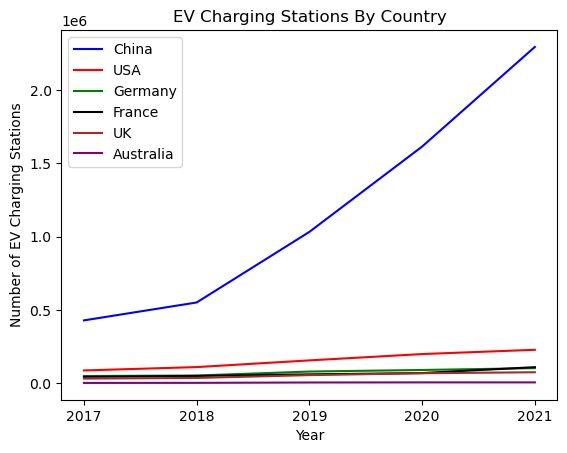

In [19]:
# Create a line chart of charing stations in the whole period for 5 biggest sales countries and australia

xtickers2 = [2017,2018,2019,2020,2021]
china_cp = filtered_df3.loc[filtered_df3["region"]=="China"].groupby(["year"])["value"].sum()
USA_cp = filtered_df3.loc[filtered_df3["region"]=="USA",:].groupby(["year"])["value"].sum()
UK_cp = filtered_df3.loc[filtered_df3["region"]=="United Kingdom",:].groupby(["year"])["value"].sum()
germany_cp = filtered_df3.loc[filtered_df3["region"]=="Germany",:].groupby(["year"])["value"].sum()
france_cp = filtered_df3.loc[filtered_df3["region"]=="France",:].groupby(["year"])["value"].sum()
aus_cp = filtered_df3.loc[filtered_df3["region"]=="Australia",:].groupby(["year"])["value"].sum()

# Create a line chart of the charling station through out the period
plt.plot(xtickers2,china_cp, label = "China",color="blue")
plt.plot(xtickers2,USA_cp, label = "USA",color="red")
plt.plot(xtickers2,germany_cp, label = "Germany",color="green")
plt.plot(xtickers2,france_cp, label = "France",color="black")
plt.plot(xtickers2,UK_cp,label = "UK",color="brown")
plt.plot(xtickers2,aus_cp, label = "Australia",color="purple")
plt.xticks(xtickers2, [2017,2018,2019,2020,2021])
plt.xlabel("Year")
plt.ylabel("Number of EV Charging Stations")
plt.title("EV Charging Stations By Country")
plt.legend(loc = "upper left")
plt.savefig("cp_linechart.png")
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

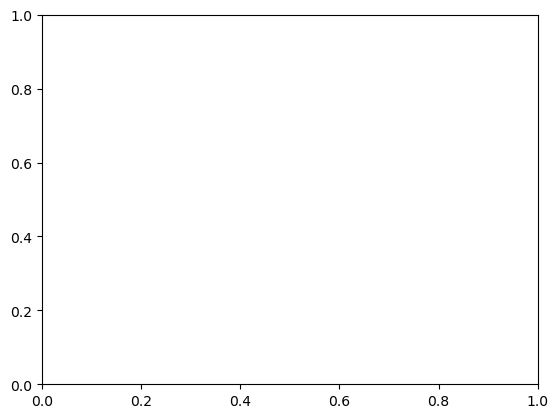

In [20]:
# Plot a bar chart of fast flow charging point
# Figure out the values of x axis and y axis
fast_cp = filtered_df3.loc[filtered_df3["powertrain"]=="Publicly available fast",:]
fast_china = fast_cp.loc[fast_cp["region"]=="China",:]["value"]
fast_USA = fast_cp.loc[fast_cp["region"]=="USA",:]["value"]
fast_UK = fast_cp.loc[fast_cp["region"]=="United Kingdom",:]["value"]
fast_germany = fast_cp.loc[fast_cp["region"]=="Germany",:]["value"]
fast_france = fast_cp.loc[fast_cp["region"]=="France",:]["value"]
fast_aus = fast_cp.loc[fast_cp["region"]=="Australia",:]["value"]

xtickers_fastcp=[2017,2018,2019,2020,2021]

# Proceed with plotting of the stacked bar chart 
plt.bar(xtickers_fastcp, fast_china, color='b', label = "China")
plt.bar(xtickers_fastcp, fast_USA, bottom=fast_china, color='r', label = "USA")
plt.bar(xtickers_fastcp, fast_UK, bottom=[x + y for x, y in zip(fast_china, fast_USA)], color='g', label = "UK")
plt.bar(xtickers_fastcp, fast_germany, bottom=[x + y+z for x, y,z in zip(fast_china, fast_USA,fast_UK)], color='black', label = "Germany")
plt.bar(xtickers_fastcp, fast_france, bottom=[x + y+z+p for x, y,z,p in zip(fast_china, fast_USA,fast_UK,fast_germany)], color='brown', label = "France")
plt.bar(xtickers_fastcp, fast_aus, bottom=[x + y+z+p+k for x, y,z,p,k in zip(fast_china, fast_USA,fast_UK,fast_germany,fast_france)], color='purple', label = "Australia")

plt.xlabel("Year")
plt.ylabel("Number of Fast Flow Charging Stations")
plt.title("Fast Flow Charging Stations By Year - 6 countries")
plt.legend(loc = "upper left")
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

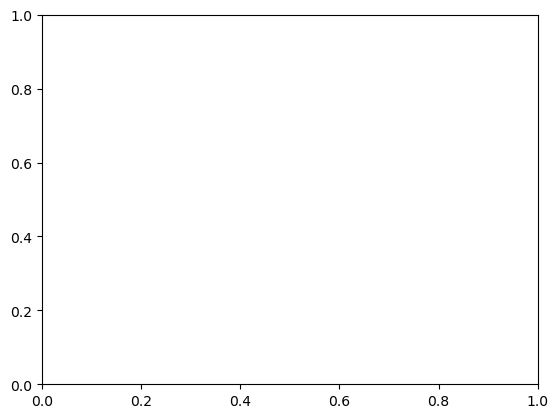

In [21]:
# Plot a bar chart of slow flow charging point
# Figure out the values of x axis and y axis
slow_cp = filtered_df3.loc[filtered_df3["powertrain"]=="Publicly available slow",:]
slow_china = slow_cp.loc[slow_cp["region"]=="China",:]["value"]
slow_USA = slow_cp.loc[slow_cp["region"]=="USA",:]["value"]
slow_UK = slow_cp.loc[slow_cp["region"]=="United Kingdom",:]["value"]
slow_germany = slow_cp.loc[slow_cp["region"]=="Germany",:]["value"]
slow_france = slow_cp.loc[slow_cp["region"]=="France",:]["value"]
slow_aus = slow_cp.loc[slow_cp["region"]=="Australia",:]["value"]

xtickers_slowcp=[2017,2018,2019,2020,2021]

# Proceed with plotting of the stacked bar chart
plt.bar(xtickers_slowcp, slow_china, color='b', label = "China")
plt.bar(xtickers_slowcp, slow_USA, bottom=slow_china, color='r',label = "USA")
plt.bar(xtickers_slowcp, slow_UK, bottom=[x + y for x, y in zip(slow_china, slow_USA)], color='g', label = "UK")
plt.bar(xtickers_slowcp, slow_germany, bottom=[x + y+z for x, y,z in zip(slow_china, slow_USA,slow_UK)], color='black', label = "Germany")
plt.bar(xtickers_slowcp, slow_france, bottom=[x + y+z+p for x, y,z,p in zip(slow_china, slow_USA,slow_UK,slow_germany)], color='brown', label = "France")
plt.bar(xtickers_slowcp, slow_aus, bottom=[x + y+z+p+k for x, y,z,p,k in zip(slow_china, slow_USA,slow_UK,slow_germany,slow_france)], color='purple', label = "Australia")

plt.xlabel("Year")
plt.ylabel("Number of Slow Flow Charging Stations")
plt.title("Slow Flow Charging Stations By Year - 6 countries")
plt.legend(loc = "upper left")
plt.show()

In [ ]:
# Create a line chart of the charging station through out the period in China
plt.plot(xtickers2,china_cp, label = "China",color="blue")
plt.xticks(xtickers2, [2017,2018,2019,2020,2021])
plt.xlabel("Year")
plt.ylabel("Number of EV Charging Stations")
plt.title("EV Charging Stations in China")
plt.legend(loc = "upper left")
plt.show()

In [ ]:
# Create a line chart of the charging station through out the period in USA
plt.plot(xtickers2,USA_cp, label = "USA",color="red")
plt.xticks(xtickers2, [2017,2018,2019,2020,2021])
plt.xlabel("Year")
plt.ylabel("Number of EV Charging Stations")
plt.title("EV Charging Stations in USA")
plt.legend(loc = "upper left")
plt.show()



In [ ]:
# Create a line chart of the charging station through out the period in Germany
plt.plot(xtickers2,germany_cp, label = "Germany",color="green")
plt.xticks(xtickers2, [2017,2018,2019,2020,2021])
plt.xlabel("Year")
plt.ylabel("Number of EV Charging Stations")
plt.title("EV Charging Stations in Germany")
plt.legend(loc = "upper left")
plt.show()


In [ ]:
# Create a line chart of the charging station through out the period in France
plt.plot(xtickers2,france_cp, label = "France",color="black")
plt.xticks(xtickers2, [2017,2018,2019,2020,2021])
plt.xlabel("Year")
plt.ylabel("Number of EV Charging Stations")
plt.title("EV Charging Stations in France")
plt.legend(loc = "upper left")
plt.show()

In [ ]:
# Create a line chart of the charging station through out the period in UK
plt.plot(xtickers2,UK_cp,label = "UK",color="brown")
plt.xticks(xtickers2, [2017,2018,2019,2020,2021])
plt.xlabel("Year")
plt.ylabel("Number of EV Charging Stations")
plt.title("EV Charging Stations in UK")
plt.legend(loc = "upper left")
plt.show()

In [ ]:
# Create a line chart of the charging station through out the period in Australia
plt.plot(xtickers2,aus_cp, label = "Australia",color="purple")
plt.xticks(xtickers2, [2017,2018,2019,2020,2021])
plt.xlabel("Year")
plt.ylabel("Number of EV Charging Stations")
plt.title("EV Charging Stations in Australia")
plt.legend(loc = "upper left")
plt.show()

In [ ]:
# Import the required libraries
import hvplot.pandas
import requests
import json
from pprint import pprint

# Import API key
from config import api_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Remove Other Europe in the total_sales
total_sales_indexed =total_sales.reset_index()

total_sales_country = total_sales_indexed.loc[total_sales_indexed["region"] !="Other Europe"]

# Create empty columns for Latitude & Longtidue


total_sales_country["Lat"] = ""
total_sales_country["Lon"] = ""

total_sales_country

In [ ]:
# Define the API parameters
params = {
    "apiKey":api_key,
    "format":"json"
}

# Set the base URL
base_url = "https://api.geoapify.com/v1/geocode/search"

In [ ]:
# Loop through the cities_pd DataFrame and search coordinates for each city
for index, row in total_sales_country.iterrows():

# Get the coutry's name to the string so geoapify finds the correct countries
    country = row["region"]

    # Add the current city to the parameters
    params["text"] = f"{country}"

    # Make the API request
    response = requests.get(base_url, params=params)
    
    # Convert reponse to JSON
    response = response.json()
    
    # Extract latitude and longitude
    total_sales_country.loc[index, "Lat"] = response["results"][0]["lat"]
    total_sales_country.loc[index, "Lon"] = response["results"][0]["lon"]

# Display sample data to confirm that the coordinates appear
total_sales_country.head()

In [ ]:
# Configure the map plot
map_plot = total_sales_country.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 1200,
    frame_height = 1000,
    size = "value",
    scale = 0.01,
    color = "region"
)

# Display the map plot
map_plot
